In [15]:
import requests
import json
from DbConn import *
from datetime import datetime, timedelta

def week_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd, max(movienm), avg(mrank), min(mrank),avg(salesshare),max(salesshare),avg(audicnt), max(audicnt),avg(scrncnt), max(scrncnt), avg(showcnt), max(showcnt),max(audiacc) 
    from boxoffice  
    where  opendt +13 >= dailydate2 and dailydate2 < TO_DATE('19/01/01', 'YY/mm/dd')
    group by moviecd
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("첫주 작업 완료. -----")
    db.disconnect()
    return  select_result


def max_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd,  max(audiacc)
    from boxoffice 
    group by moviecd
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("누적 작업 완료. -----")
    db.disconnect()
    return  select_result

def genre_dataframe():
    db = DbConn()
    
    select_query = """
    select max(moviecd),  max(genrenm)
    from moviedetail
    group by moviecd
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("누적 작업 완료. -----")
    db.disconnect()
    return  select_result

# print(week_dataframe())
# print(max_dataframe())
print(genre_dataframe())


누적 작업 완료. -----
[(19720061, '액션'), (19818004, '드라마'), (19880001, '애니메이션'), (19890291, '코미디'), (19900204, '드라마'), (19900335, '드라마'), (19910247, '액션'), (19950327, '범죄'), (19960126, '멜로/로맨스'), (19970099, '멜로/로맨스'), (19980074, '드라마'), (19990050, '드라마'), (19990140, '드라마'), (19990220, '멜로/로맨스'), (19990303, '액션'), (20000067, '멜로/로맨스'), (20010238, '미스터리'), (20010291, '가족'), (20020168, '애니메이션'), (20020186, '뮤지컬'), (20020222, '드라마'), (20030003, '드라마'), (20030404, '멜로/로맨스'), (20040525, '드라마'), (20040526, '코미디'), (20040695, '코미디'), (20040734, '멜로/로맨스'), (20040756, '애니메이션'), (20041524, '애니메이션'), (20050082, '멜로/로맨스'), (20060127, '드라마'), (20060204, '애니메이션'), (20060347, '드라마'), (20068576, '멜로/로맨스'), (20068659, '애니메이션'), (20070083, '드라마'), (20070454, '드라마'), (20070458, '멜로/로맨스'), (20070582, '드라마'), (20070602, '애니메이션'), (20071066, '멜로/로맨스'), (20078561, '애니메이션'), (20080071, '스릴러'), (20080349, '코미디'), (20081056, '범죄'), (20090683, '드라마'), (20090834, 'SF'), (20098169, '액션'), (20100211, '애니메이션'), (20110027, 

In [16]:
import pandas as pd

df_genre_column_name = ['mnumber', 'genrenm']
df_genre = pd.DataFrame(genre_dataframe(), columns=df_genre_column_name)
df_genre.tail()


누적 작업 완료. -----


,mnumber,genrenm
1549,20199949,드라마
1550,20199950,액션
1551,20199951,공포(호러)
1552,20199954,코미디
1553,20199981,애니메이션


In [17]:
# new_nation =[]
# for i in df_nation['mnation']:
#     if i in ['한국','미국','일본','중국','영국','프랑스']:
#         new_nation.append(i)
#     else :
#         new_nation.append('기타국가')

# df_nation['mnation'] = new_nation
# df_nation.head()

In [18]:
df_genre = pd.get_dummies(df_genre,columns=['genrenm'])
df_genre.head()

,mnumber,genrenm_SF,genrenm_가족,genrenm_공연,genrenm_공포(호러),genrenm_기타,genrenm_다큐멘터리,genrenm_드라마,genrenm_멜로/로맨스,genrenm_뮤지컬,genrenm_미스터리,genrenm_범죄,genrenm_사극,genrenm_스릴러,genrenm_애니메이션,genrenm_액션,genrenm_어드벤처,genrenm_전쟁,genrenm_코미디,genrenm_판타지
0,19720061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,19818004,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,19880001,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,19890291,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,19900204,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
import pandas as pd

df_week_column_name = ['mnumber', 'mname','avg_rank', 'min_rank', 
                       'avg_dshare','max_dshare', 
                       'avg_dpeople','max_dpeople', 'avg_dscreen','max_dscreen',
                       'avg_dview','max_dview','sum_dpeople']
df_week = pd.DataFrame(week_dataframe(), columns=df_week_column_name)
df_week.tail()


첫주 작업 완료. -----


,mnumber,mname,avg_rank,min_rank,avg_dshare,max_dshare,avg_dpeople,max_dpeople,avg_dscreen,max_dscreen,avg_dview,max_dview,sum_dpeople
1226,20189843,호두까기 인형과 4개의 왕국,4.615385,4,5.715385,8.1,33308.153846,82644,252.153846,294,971.384615,1320,433779
1227,20189861,더 포스트,8.818182,8,2.009091,3.0,9399.636364,17818,221.000000,281,454.636364,614,111760
1228,20189869,해피 투게더,9.600000,9,0.460000,0.6,2160.000000,3191,169.400000,240,244.400000,373,20989
1229,20189882,반딧불이 딘딘,9.000000,9,1.600000,1.7,5105.000000,5494,272.000000,274,332.000000,335,29414
1230,20189901,더 포리너,9.750000,9,2.025000,3.9,4963.250000,8178,150.750000,156,462.000000,547,35694


In [20]:
df_max_column_name = ['mnumber', 'sum_total_people']
df_max = pd.DataFrame(max_dataframe(), columns=df_max_column_name )
df_max.tail()

누적 작업 완료. -----


,mnumber,sum_total_people
1548,20199949,8991
1549,20199950,5234641
1550,20199951,471266
1551,20199954,8491
1552,20199981,143853


In [21]:
df = pd.merge(df_week,df_max, on='mnumber')

df = pd.merge(df,df_genre, on='mnumber')


df.tail()

,mnumber,mname,avg_rank,min_rank,avg_dshare,max_dshare,avg_dpeople,max_dpeople,avg_dscreen,max_dscreen,...,genrenm_미스터리,genrenm_범죄,genrenm_사극,genrenm_스릴러,genrenm_애니메이션,genrenm_액션,genrenm_어드벤처,genrenm_전쟁,genrenm_코미디,genrenm_판타지
1226,20189843,호두까기 인형과 4개의 왕국,4.615385,4,5.715385,8.1,33308.153846,82644,252.153846,294,...,0,0,0,0,0,0,0,0,0,1
1227,20189861,더 포스트,8.818182,8,2.009091,3.0,9399.636364,17818,221.000000,281,...,0,0,0,0,0,0,0,0,0,0
1228,20189869,해피 투게더,9.600000,9,0.460000,0.6,2160.000000,3191,169.400000,240,...,0,0,0,0,0,0,0,0,0,0
1229,20189882,반딧불이 딘딘,9.000000,9,1.600000,1.7,5105.000000,5494,272.000000,274,...,0,0,0,0,1,0,0,0,0,0
1230,20189901,더 포리너,9.750000,9,2.025000,3.9,4963.250000,8178,150.750000,156,...,0,0,0,0,0,1,0,0,0,0


In [22]:
# df['sum_total_people'].describe()
print(df['sum_total_people'].quantile(q=0.9, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.75, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.5, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.25, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0, interpolation='nearest')
     )

a = df['sum_total_people'].quantile(q=0.9, interpolation='nearest')
b = df['sum_total_people'].quantile(q=0.75, interpolation='nearest')
c = df['sum_total_people'].quantile(q=0.5, interpolation='nearest')
d = df['sum_total_people'].quantile(q=0.25, interpolation='nearest')
e = df['sum_total_people'].quantile(q=0, interpolation='nearest')
# 10%
# 25%
# 50%
# 75%
# 100%

2607123 679870 129584 30303 810


In [23]:
score_list = []
for i in df['sum_total_people']:
    if i >= a:
        score_list.append('A')
    elif i >= b:
        score_list.append('B')
    elif i >= c:
        score_list.append('C')
    elif i >= d:
        score_list.append('D')
    else :
        score_list.append('F')

        
df['score'] = score_list
df['score'].head()

0    D
1    C
2    C
3    C
4    A
Name: score, dtype: object

In [24]:
df.groupby('score')['score'].count()

score
A    124
B    185
C    307
D    307
F    308
Name: score, dtype: int64

In [26]:
X = df.drop(['mnumber', 'mname','sum_total_people','score'], axis=1)
X.tail()

,avg_rank,min_rank,avg_dshare,max_dshare,avg_dpeople,max_dpeople,avg_dscreen,max_dscreen,avg_dview,max_dview,...,genrenm_미스터리,genrenm_범죄,genrenm_사극,genrenm_스릴러,genrenm_애니메이션,genrenm_액션,genrenm_어드벤처,genrenm_전쟁,genrenm_코미디,genrenm_판타지
1226,4.615385,4,5.715385,8.1,33308.153846,82644,252.153846,294,971.384615,1320,...,0,0,0,0,0,0,0,0,0,1
1227,8.818182,8,2.009091,3.0,9399.636364,17818,221.000000,281,454.636364,614,...,0,0,0,0,0,0,0,0,0,0
1228,9.600000,9,0.460000,0.6,2160.000000,3191,169.400000,240,244.400000,373,...,0,0,0,0,0,0,0,0,0,0
1229,9.000000,9,1.600000,1.7,5105.000000,5494,272.000000,274,332.000000,335,...,0,0,0,0,1,0,0,0,0,0
1230,9.750000,9,2.025000,3.9,4963.250000,8178,150.750000,156,462.000000,547,...,0,0,0,0,0,1,0,0,0,0


In [27]:
Y=df['score']

In [28]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# train, test 7:3
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.3, random_state=999)

In [29]:
model = RandomForestClassifier(n_estimators=10, random_state=999)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=999, verbose=0, warm_start=False)

In [30]:
model.score(X_train,y_train)

0.9941927990708479

In [31]:
model.score(X_test,y_test)

0.9378378378378378

In [32]:
# cunfuse matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conMat = pd.DataFrame(confusion_matrix(y_test,y_pred),
                         index=['True[A]', 'True[B]', 'True[C]', 'True[D]',  'True[F]'],
                         columns=['Pred[A]', 'Pred[B]', 'Pred[C]', 'Pred[D]', 'Pred[F]'])

 # 정확도, precision, recall, f1
conMat

,Pred[A],Pred[B],Pred[C],Pred[D],Pred[F]
True[A],30,2,1,0,0
True[B],7,54,3,0,0
True[C],0,0,83,2,0
True[D],0,0,4,89,3
True[F],0,0,0,1,91


In [33]:
feat_labels = X.columns
feat_labels

Index(['avg_rank', 'min_rank', 'avg_dshare', 'max_dshare', 'avg_dpeople',
       'max_dpeople', 'avg_dscreen', 'max_dscreen', 'avg_dview', 'max_dview',
       'sum_dpeople', 'genrenm_SF', 'genrenm_가족', 'genrenm_공연',
       'genrenm_공포(호러)', 'genrenm_기타', 'genrenm_다큐멘터리', 'genrenm_드라마',
       'genrenm_멜로/로맨스', 'genrenm_뮤지컬', 'genrenm_미스터리', 'genrenm_범죄',
       'genrenm_사극', 'genrenm_스릴러', 'genrenm_애니메이션', 'genrenm_액션',
       'genrenm_어드벤처', 'genrenm_전쟁', 'genrenm_코미디', 'genrenm_판타지'],
      dtype='object')

 1) genrenm_공포(호러)                 0.000768
 2) genrenm_드라마                    0.004444
 3) avg_dshare                     0.055651
 4) genrenm_다큐멘터리                  0.001314
 5) sum_dpeople                    0.402167
 6) max_dscreen                    0.040092
 7) avg_dscreen                    0.020731
 8) avg_rank                       0.019521
 9) genrenm_멜로/로맨스                 0.000493
10) max_dshare                     0.038380
11) max_dview                      0.054798
12) avg_dview                      0.077923
13) genrenm_SF                     0.000233
14) genrenm_기타                     0.000000
15) genrenm_공연                     0.000000
16) min_rank                       0.028574
17) avg_dpeople                    0.107529
18) max_dpeople                    0.138768
19) genrenm_가족                     0.000000
20) genrenm_판타지                    0.000088
21) genrenm_스릴러                    0.000007
22) genrenm_코미디                    0.001389
23) genrenm_어드벤처                

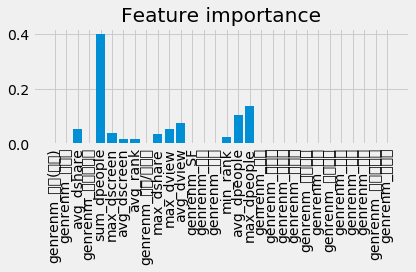

In [34]:
import numpy as np

plt.style.use('fivethirtyeight')

importances = model.feature_importances_
indices = np.argsort(importances[::-1])
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f"%(f+1,30,feat_labels[indices[f]],
                         importances[indices[f]]))
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.tight_layout()
plt.show()